# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Create a plot for date and daily price movement of USD to Rp conversion rate from https://www.exchange-rates.org/history/IDR/USD/T

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [4]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [28]:
table = soup.find('table', attrs={'history-rates-data'})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-08-31">
     August 31, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-08-31">
     2023-8-31
    </a>
   </td>
   <td>
    <span class="w">
     <span class="


In [46]:
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <td>
   <a class="w" href="/exchange-rate-history/usd-idr-2023-08-31">
    August 31, 2023
   </a>
   <a class="n" href="/exchange-rate-history/usd-idr-2023-08-31">
    2023-8-31
   </a>
  </td>
  <td>
   <span class="w">
    <span class="nowrap">
     <span class="currencySymbol">
      $
     </span>
     1 =
    </span>
    <span class="nowrap">
     <span class="currencySymbol">
      Rp
     </span>
     15,225
    </span>
   </span>
   <span class="n">
    <span class="nowr


So I was exploring the web and tried several "Key" to find the correct line table with class, after few errors, I found "a class n" for the date and "span class n" for the rate

In [54]:
table.find_all('a', attrs={'class':'n'})[:5]

[<a class="n" href="/exchange-rate-history/usd-idr-2023-08-31">2023-8-31</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-30">2023-8-30</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-29">2023-8-29</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-28">2023-8-28</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-25">2023-8-25</a>]

In [53]:
table.find_all('a', attrs={'class':'n'})[0].text

'2023-8-31'

In [55]:
table.find_all('span', attrs={'class':'n'})[:5]

[<span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,225</span></span>,
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,223</span></span>,
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,202</span></span>,
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,248</span></span>,
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,298</span></span>]

In [56]:
table.find_all('span', attrs={'class':'n'})[0].text

'$1 = Rp15,225'

Finding row length.

In [24]:
row = table.find_all('a', attrs={'class':'n'})
row_length = len(row)
row_length

129

In [57]:
row = table.find_all('span', attrs={'class':'n'})
row_length = len(row)
row_length

129

I needed to check both to make sure I have the same exact amount of data. I took the data from the site table, and it gave me 129 days of conversion rate

Do the scrapping process here (please change this markdown with your explanation)

I did the looping for the date and rate data and then I created list with date as the 1st column, and rate as the 2nd column

In [65]:
temp = [] #initiating a tuple

for i in range(0, row_length):
    date = table.find_all('a', attrs={'class':'n'})[i].text
    rate = table.find_all('span', attrs={'class':'n'})[i].text
    
    #scrapping process
    temp.append((date,rate))
    
temp 

[('2023-8-31', '$1 = Rp15,225'),
 ('2023-8-30', '$1 = Rp15,223'),
 ('2023-8-29', '$1 = Rp15,202'),
 ('2023-8-28', '$1 = Rp15,248'),
 ('2023-8-25', '$1 = Rp15,298'),
 ('2023-8-24', '$1 = Rp15,246'),
 ('2023-8-23', '$1 = Rp15,301'),
 ('2023-8-22', '$1 = Rp15,324'),
 ('2023-8-21', '$1 = Rp15,325'),
 ('2023-8-18', '$1 = Rp15,321'),
 ('2023-8-17', '$1 = Rp15,343'),
 ('2023-8-16', '$1 = Rp15,369'),
 ('2023-8-15', '$1 = Rp15,318'),
 ('2023-8-14', '$1 = Rp15,330'),
 ('2023-8-11', '$1 = Rp15,324'),
 ('2023-8-10', '$1 = Rp15,263'),
 ('2023-8-9', '$1 = Rp15,214'),
 ('2023-8-8', '$1 = Rp15,212'),
 ('2023-8-7', '$1 = Rp15,225'),
 ('2023-8-4', '$1 = Rp15,153'),
 ('2023-8-3', '$1 = Rp15,148'),
 ('2023-8-2', '$1 = Rp15,227'),
 ('2023-8-1', '$1 = Rp15,121'),
 ('2023-7-31', '$1 = Rp15,099'),
 ('2023-7-28', '$1 = Rp15,107'),
 ('2023-7-27', '$1 = Rp15,102'),
 ('2023-7-26', '$1 = Rp15,009'),
 ('2023-7-25', '$1 = Rp15,027'),
 ('2023-7-24', '$1 = Rp15,022'),
 ('2023-7-21', '$1 = Rp15,043'),
 ('2023-7-20', '$

## Creating data frame & Data wrangling

Put the array into dataframe

In [66]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date', 'rate'))
df.head()

,date,rate
0,2023-8-31,"$1 = Rp15,225"
1,2023-8-30,"$1 = Rp15,223"
2,2023-8-29,"$1 = Rp15,202"
3,2023-8-28,"$1 = Rp15,248"
4,2023-8-25,"$1 = Rp15,298"


In [95]:
df.shape

(129, 1)

Gotta check if the number is right. yes, it's 129

In [62]:
df.dtypes

date    object
rate    object
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [68]:
df['date']=df['date'].astype('datetime64[ns]')
df.dtypes

date    datetime64[ns]
rate            object
dtype: object

In [84]:
df['date'].dt.to_period("D")

0      2023-08-31
1      2023-08-30
2      2023-08-29
3      2023-08-28
4      2023-08-25
          ...    
124    2023-03-10
125    2023-03-09
126    2023-03-08
127    2023-03-07
128    2023-03-06
Name: date, Length: 129, dtype: period[D]

Changed the date into datetime and just to make sure I made the date into period("D")

In [76]:
df['rate'] = df['rate'].str.replace(',', '')
df['rate'] = df['rate'].str.replace('$', '')
df['rate']

0       = Rp15225
1       = Rp15223
2       = Rp15202
3       = Rp15248
4       = Rp15298
          ...    
124     = Rp15503
125     = Rp15495
126     = Rp15449
127     = Rp15429
128     = Rp15354
Name: rate, Length: 129, dtype: object

In [77]:
df['rate'] = df['rate'].str.replace(',', '')
df['rate'] = df['rate'].str.replace('=', '')
df['rate']

0        Rp15225
1        Rp15223
2        Rp15202
3        Rp15248
4        Rp15298
         ...    
124      Rp15503
125      Rp15495
126      Rp15449
127      Rp15429
128      Rp15354
Name: rate, Length: 129, dtype: object

In [78]:
df['rate'] = df['rate'].str.replace(',', '')
df['rate'] = df['rate'].str.replace('Rp', '')
df['rate']

0        15225
1        15223
2        15202
3        15248
4        15298
        ...   
124      15503
125      15495
126      15449
127      15429
128      15354
Name: rate, Length: 129, dtype: object

Since I have anxiety, so I prefer to replace the $1=Rp one by one, to make sure that I did it correctly. Then I changed the numbers into float

In [85]:
df['rate']=df['rate'].astype('float64')
df.dtypes

date    datetime64[ns]
rate           float64
dtype: object

In [86]:
df.head()

,date,rate
0,2023-08-31,15225.0
1,2023-08-30,15223.0
2,2023-08-29,15202.0
3,2023-08-28,15248.0
4,2023-08-25,15298.0


In [88]:
df=df.set_index('date')

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

I tried to create the plot without fixing the date using index (as shown above) and the plot turned out weird, so I did that and it fixed the problem! 

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<Axes: xlabel='date'>

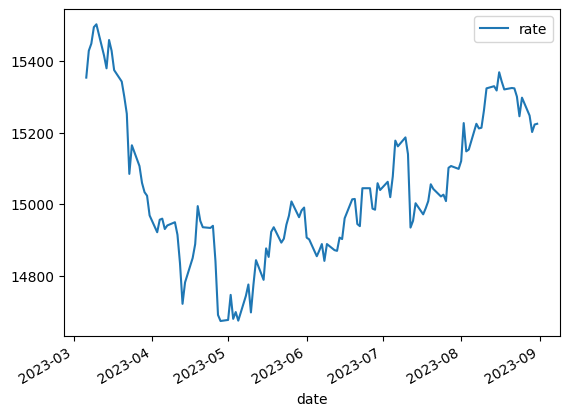

In [96]:
df.plot()

- The conversion rate of 1 USD to Rupiah varied daily but ranged between 16.000 to 14.000 between March to September 2023. 
- The highest conversion rate was around Rp16.000 per Dollar that occured in Early March 2023, while the lowest rate was in May 2023 where 1 USD plummeted to only Rp.14.000. 
- The USD then gradually increased to aroung Rp. 15.400 from June to September

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.